In [3]:
#BUILD A MODEL TO LEARN FROM THIS DATA AND BE ABLE TO PREDICT THE GPA GIVEN any sat score
import pandas as pd
lpath="/Users/sireesh/Downloads/"
d=pd.read_csv(lpath+"Scores.csv")
d.head() #top 5 records displayed

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(d,test_size=0.2,shuffle=False)
train_set.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


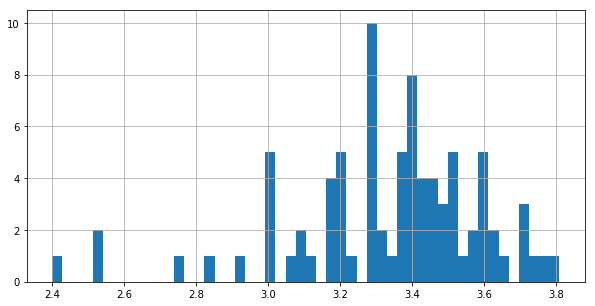

In [6]:
import matplotlib.pyplot as plt
d['GPA'].hist(bins=50,figsize=(10,5))
plt.show()

In [15]:
#preparing data for ML Algo's
#seperate the target from dataset
import numpy as np
train_set_x=train_set["SAT"]
train_set_x=train_set_x[:,np.newaxis]/100

train_set_y=train_set["GPA"]
train_set_y=train_set_y[:,np.newaxis]

test_set_x=test_set["SAT"]
test_set_x=test_set_x[:,np.newaxis]/100
test_set_y=test_set["GPA"]
test_set_y=test_set_y[:,np.newaxis]

print(train_set_x[1:3])
print(train_set_y[1:3])
print(test_set_x[1:3])
print(test_set_y[1:3])

[[16.64]
 [17.6 ]]
[[2.52]
 [2.54]]
[[18.61]
 [19.31]]
[[3.58]
 [3.58]]


In [16]:
#LINEAR REGRESSION
#Train the Model
#MODEL FIT
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(train_set_x,train_set_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
#PREDICTION
#PREDICTION
GPA_y_predict=regr.predict(test_set_x)
GPA_y_predict

array([[3.40232933],
       [3.30341862],
       [3.3982645 ],
       [3.40097438],
       [3.19095851],
       [3.45788191],
       [3.40232933],
       [3.5202092 ],
       [3.51207956],
       [3.48769062],
       [3.51885426],
       [3.27902968],
       [3.40503921],
       [3.23431663],
       [3.4741412 ],
       [3.44026768],
       [3.5595025 ]])

In [13]:
#FINE TUNE THE MODEL #what is the error?
from sklearn.metrics import mean_squared_error,r2_score
np.set_printoptions(suppress=True)
print(test_set_y.dtype,GPA_y_predict.dtype)
print("Actual Data..",test_set_y)
print("Predicted Values..",GPA_y_predict)
print(mean_squared_error(test_set_y,GPA_y_predict))

float64 float64
Actual Data.. [[3.54]
 [3.58]
 [3.58]
 [3.59]
 [3.59]
 [3.6 ]
 [3.6 ]
 [3.61]
 [3.62]
 [3.64]
 [3.65]
 [3.71]
 [3.71]
 [3.71]
 [3.73]
 [3.76]
 [3.81]]
Predicted Values.. [[3.40232933]
 [3.30341862]
 [3.3982645 ]
 [3.40097438]
 [3.19095851]
 [3.45788191]
 [3.40232933]
 [3.5202092 ]
 [3.51207956]
 [3.48769062]
 [3.51885426]
 [3.27902968]
 [3.40503921]
 [3.23431663]
 [3.4741412 ]
 [3.44026768]
 [3.5595025 ]]
0.06931020710133429


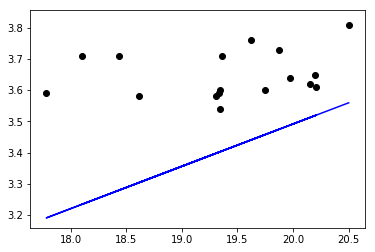

In [18]:
plt.scatter(test_set_x,test_set_y, color='black')
plt.plot(test_set_x,GPA_y_predict, color='blue')
plt.show()